<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>



# Laboratorio de Codificación de Variables Categóricas

AutoRenew, la empresa líder en la venta de coches de segunda mano, continúa con el desarrollo del modelo predictivo que ayudará a estimar el precio de los vehículos usados. Hasta ahora, has realizado un análisis exploratorio, gestionado los valores nulos y tratado los outliers en el conjunto de datos. El siguiente paso en el proceso de preprocesamiento es manejar las variables categóricas para que el modelo de machine learning pueda interpretarlas correctamente.

En este laboratorio, te centrarás en la **codificación de variables categóricas**. Dado que los modelos de machine learning requieren datos numéricos para funcionar, es crucial convertir las variables categóricas en un formato que los algoritmos puedan procesar. Trabajarás con el mismo conjunto de datos que has utilizado en los laboratorios anteriores, enfocándote ahora en transformar las columnas categóricas de manera efectiva.

**Instrucciones:**

1. **Identificación de Variables Categóricas:** Revisa el conjunto de datos e identifica las columnas que contienen variables categóricas. Estas son las columnas que contienen texto o categorías que necesitan ser transformadas en valores numéricos para ser utilizadas en el modelo de machine learning.

2. **Selección de Técnicas de Codificación:** Decide qué técnica(s) de codificación aplicar a cada variable categórica. Algunas de las opciones que tienes son:

   - **Label Encoding:** Asigna un número único a cada categoría dentro de una variable.

   - **One-Hot Encoding:** Crea nuevas columnas binarias (0/1) para cada categoría única en una variable.

   - **Target Encoding:** Utiliza la media del target (en este caso, el `price`) para codificar las categorías, si consideras que podría ser útil.

3. **Aplicación de la Codificación:** Implementa las técnicas seleccionadas en las variables categóricas. Asegúrate de revisar cómo estas transformaciones afectan el conjunto de datos y de mantener un registro de los cambios realizados.

4. **Verificación del Conjunto de Datos Transformado:** Una vez que hayas aplicado la codificación, verifica que el conjunto de datos resultante esté listo para ser utilizado en el modelo de machine learning. Asegúrate de que no queden variables categóricas sin codificar y que la estructura del conjunto de datos sea adecuada para el análisis.

**Nota:** Este laboratorio es parte de una serie continua en la que utilizas el mismo conjunto de datos a lo largo de la semana. Documenta bien los pasos que sigas, ya que esta codificación será clave para los modelos que desarrollarás más adelante.



In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Ignorar los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

import numpy as np

# Para la visualización 
# -----------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Otros objetivos
# -----------------------------------------------------------------------
import math
from itertools import combinations

# Para pruebas estadísticas
# -----------------------------------------------------------------------
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Para la codificación de las variables numéricas
# -----------------------------------------------------------------------
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder # para poder aplicar los métodos de OneHot, Ordinal,  Label y Target Encoder 

from src import Asunciones as sas
from src import soporte_preprocesamiento as sp
from src import soporte_encoding as se

from category_encoders import TargetEncoder

In [2]:
df = pd.read_csv("datos/outliersNum.csv", index_col=0)

In [3]:
df.tail(5)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,model,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,lastSeen,kilometer_robust,powerCV_robust
330611,2016-03,Suche_t4___vito_ab_6_sitze,private,offer,2200.0,test,Sin informacion,Moderno,Sin informacion,Sin informacion,1.0,Sin informacion,sonstige_autos,Sin informacion,2016-03,2016-04,-2.6,0.152152
330612,2016-03,Smart_smart_leistungssteigerung_100ps,private,offer,1199.0,test,convertible,Moderno,automatic,fortwo,3.0,petrol,smart,no,2016-03,2016-03,-0.5,-0.349230
330613,2016-03,Volkswagen_Multivan_T4_TDI_7DC_UY2,private,offer,9200.0,test,bus,Clásico,manually,transporter,3.0,diesel,volkswagen,no,2016-03,2016-04,0.0,-0.332281
330614,2016-03,VW_Golf_Kombi_1_9l_TDI,private,offer,3400.0,test,combi,Moderno,manually,golf,6.0,diesel,volkswagen,Sin informacion,2016-03,2016-03,0.0,-0.366179
330615,2016-03,BMW_M135i_vollausgestattet_NP_52.720____Euro,private,offer,28990.0,control,Sin informacion,Moderno,manually,m_reihe,8.0,petrol,bmw,no,2016-03,2016-03,-2.0,3.311787


In [3]:
df['monthOfRegistration'] = df['monthOfRegistration'].astype(str)

In [4]:
for column in df.select_dtypes(include="O").columns:
    print(f"Columna '{column}':")
    print(df[column].value_counts())
    print("\n")

Columna 'dateCrawled':
dateCrawled
2016-03    276250
2016-04     54366
Name: count, dtype: int64


Columna 'name':
name
BMW_318i                                                624
Volkswagen_Golf_1.4                                     602
BMW_316i                                                520
BMW_320i                                                491
Opel_Corsa                                              487
                                                       ... 
Nissan_Micra_1.2_Season_Klima__CD/Radio__5_tuerer         1
Fiat_Punto_Evo_1.Hand                                     1
Crysler_new_Yorker                                        1
HYUNDAI_IX35___2.0L___Benzin___STYLE_mit_PLUS_PAKETT      1
BMW_M135i_vollausgestattet_NP_52.720____Euro              1
Name: count, Length: 205339, dtype: int64


Columna 'seller':
seller
private       330614
commercial         2
Name: count, dtype: int64


Columna 'offerType':
offerType
offer      330611
request         5
Name: count, d

Eliminaremos las columnas "name" y "model", por contener 270k y 250 valores únicos, así como "seller" y "offerType", que en una de las categorías contienen entre 2 y 5 registros. "lastSeen" la eliminaremos por contener los mismos registros que "dateCrawled"

In [5]:
df.drop(columns=["name","model","seller","offerType","lastSeen"], inplace=True)

In [6]:
lista_col_categ = df.select_dtypes(include="O").columns.tolist()
lista_col_categ

['dateCrawled',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated']

In [7]:
visualizador = sp.Visualizador(df)

In [8]:
visual_encoding = se.Analisis_Visual_Encoding(df, lista_col_categ, "price")

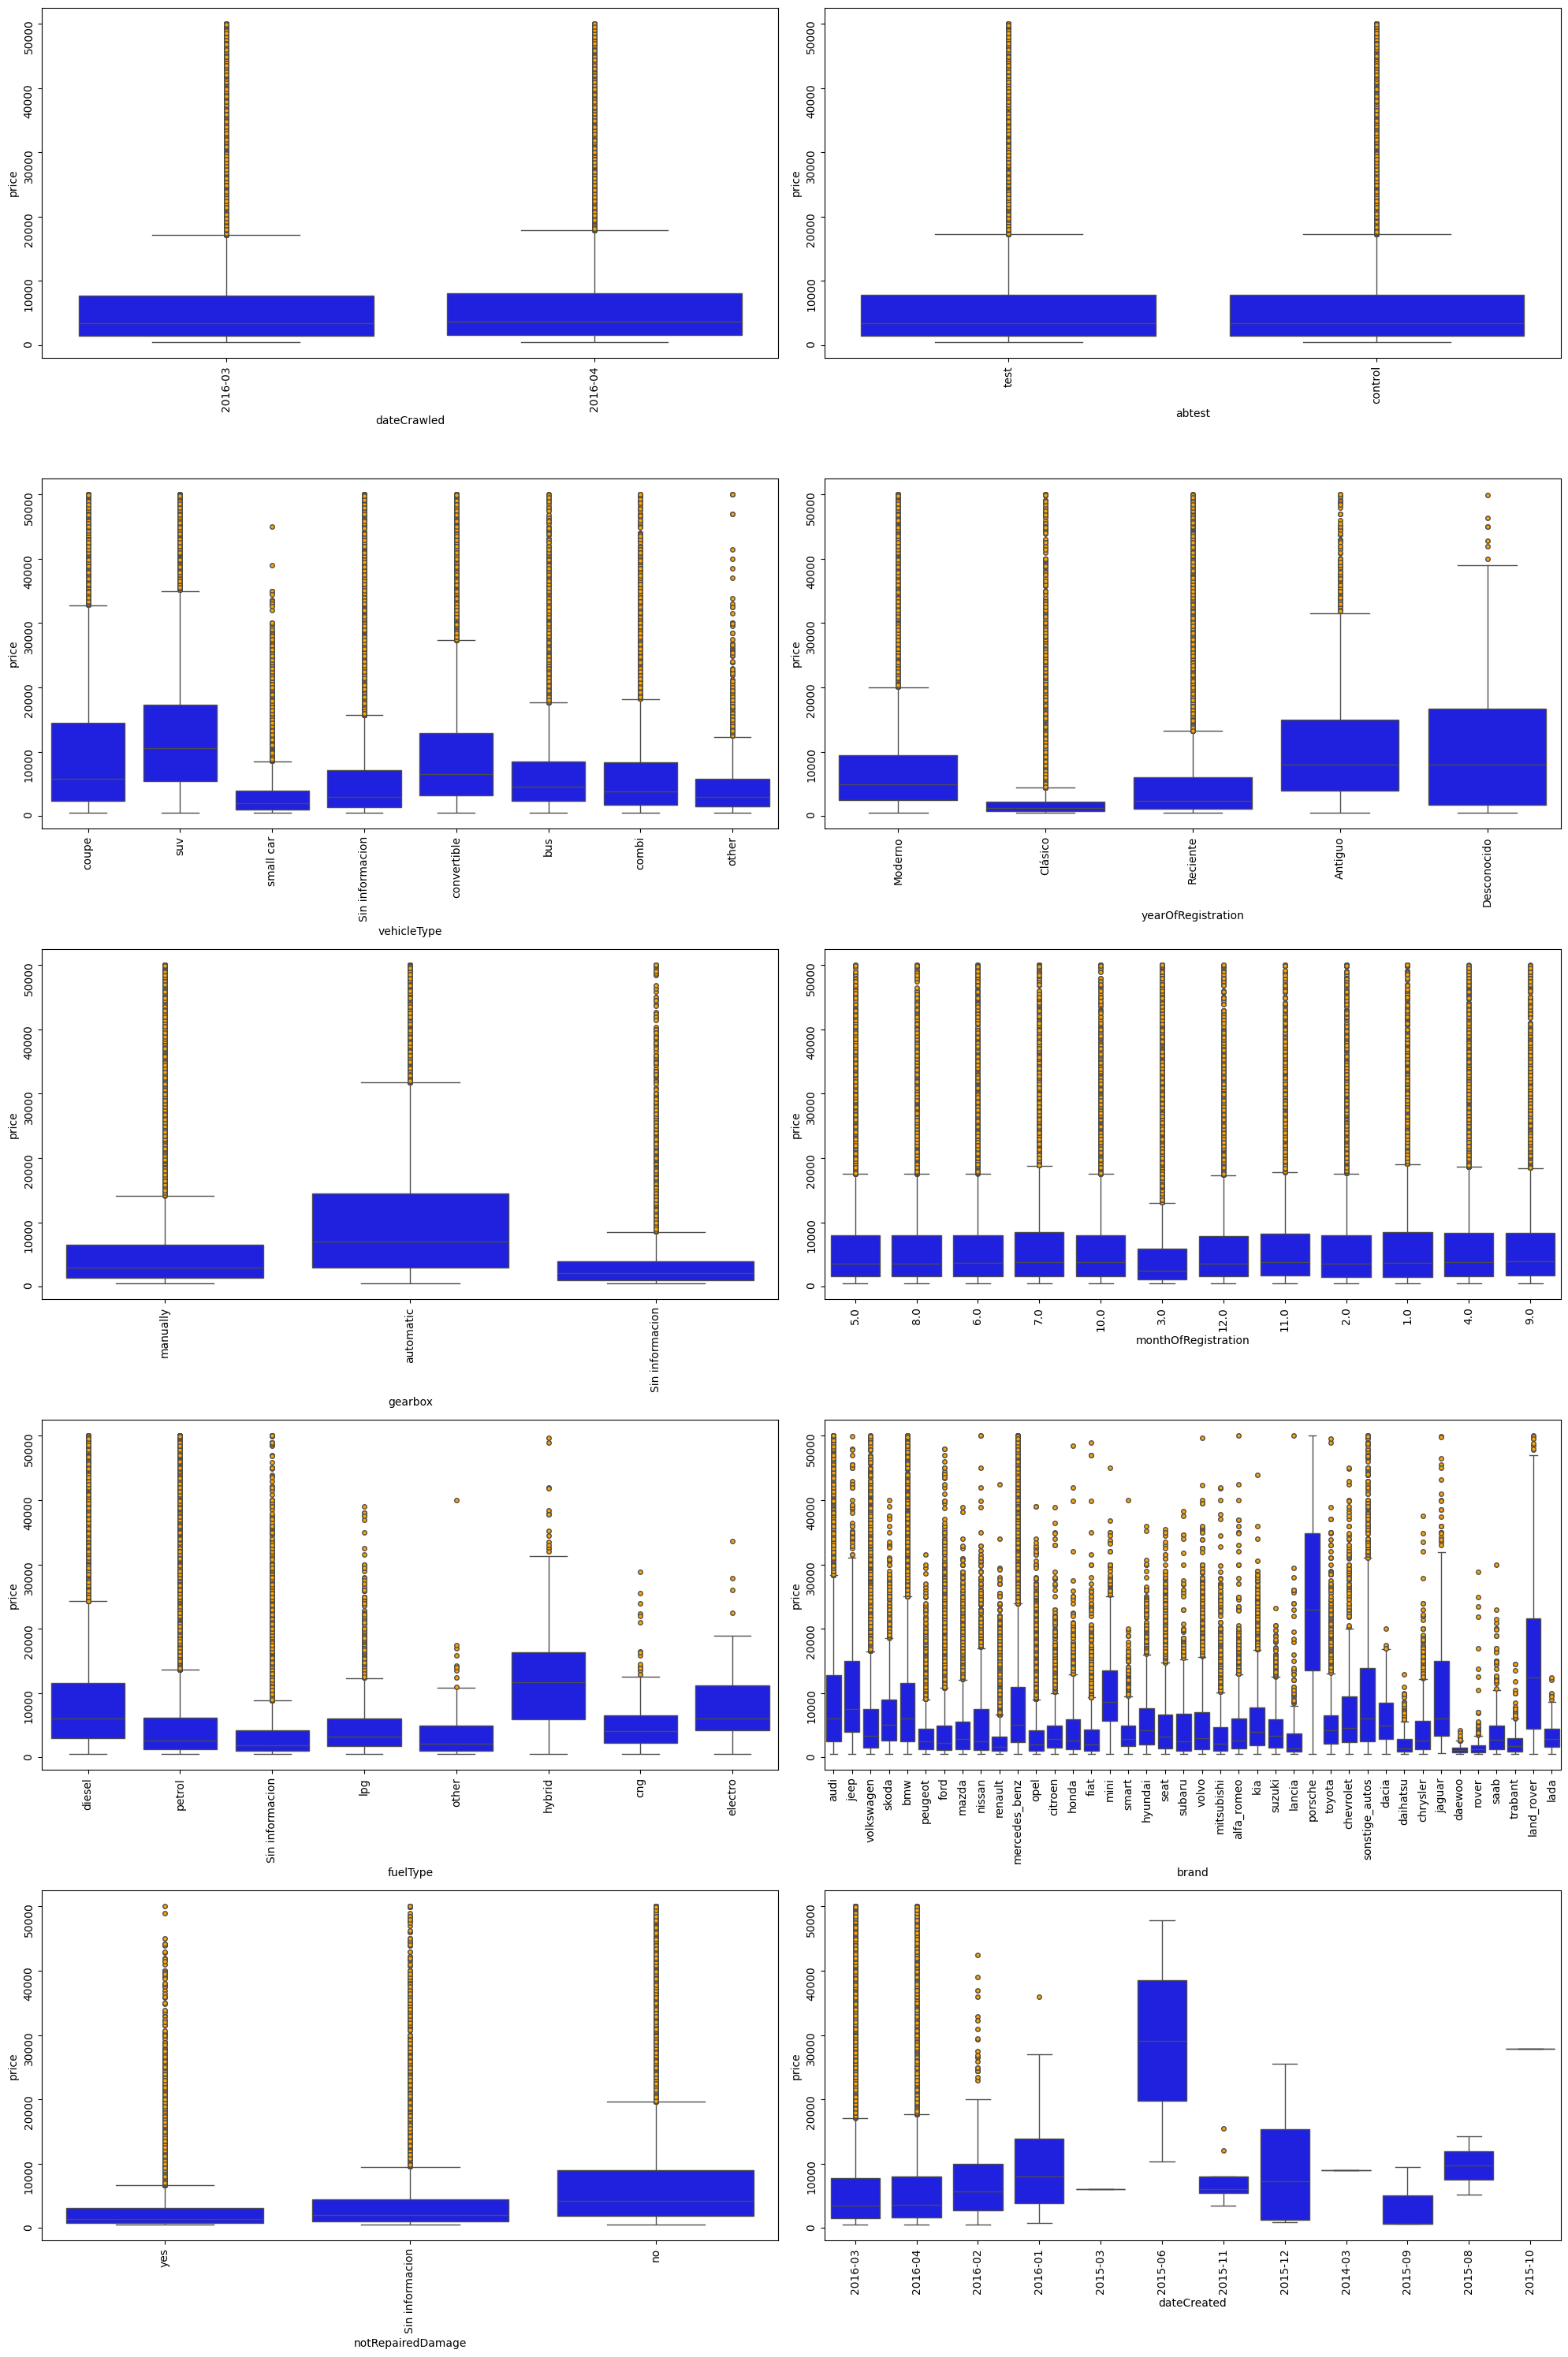

In [10]:
visual_encoding.crear_boxplot(tamano_grafica=(20, 30))

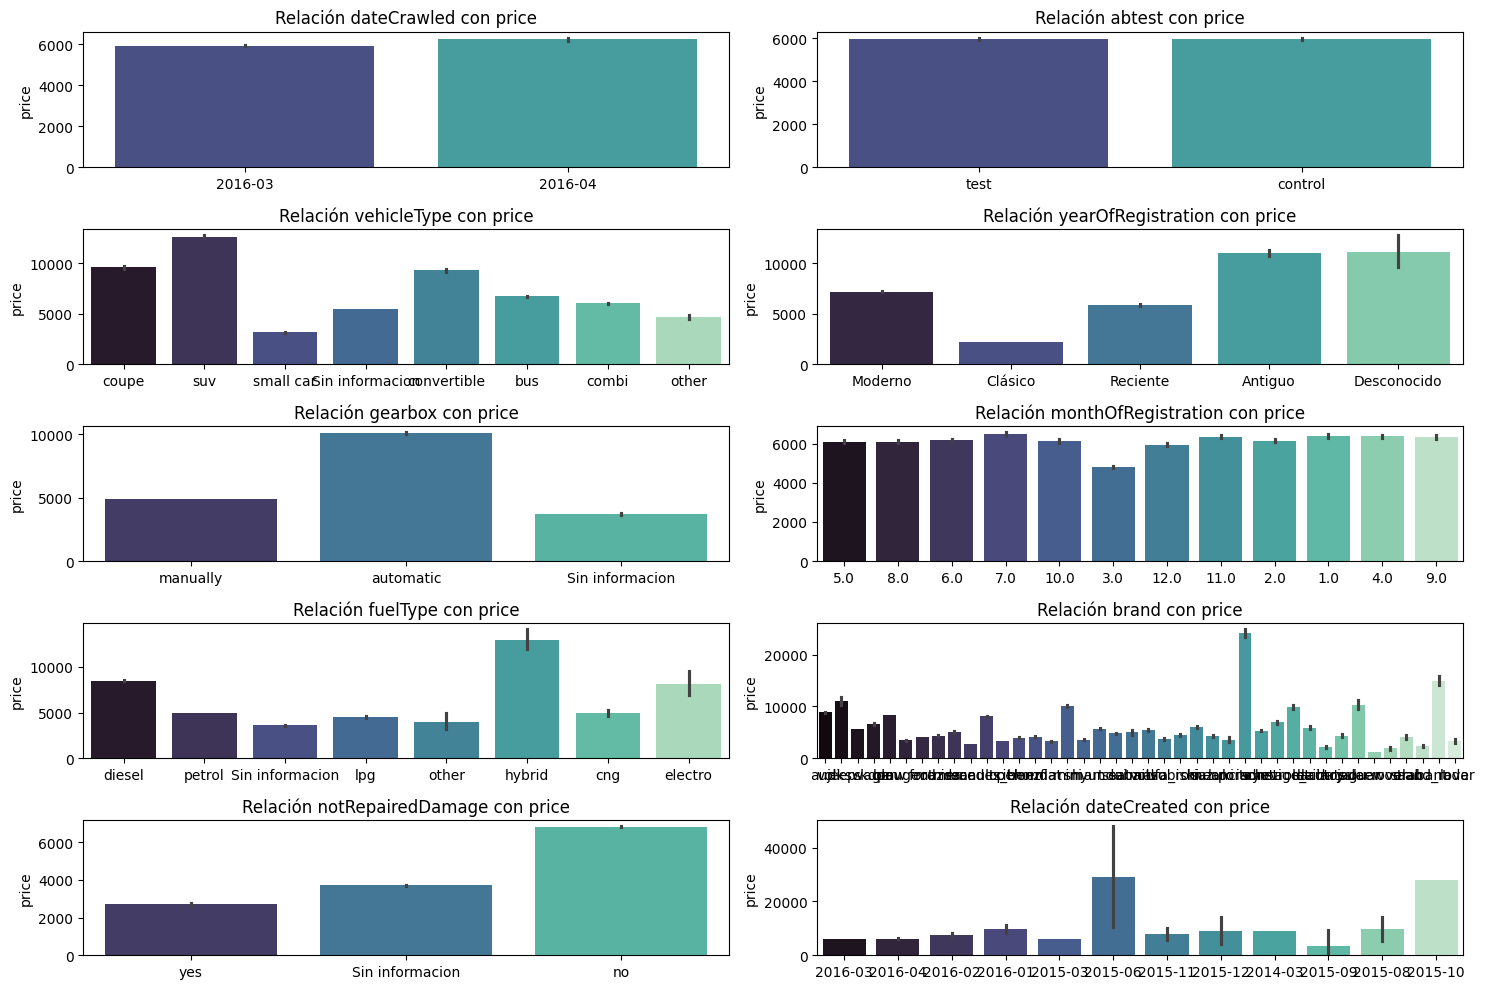

In [11]:
se.visualizar_categorias(df, lista_col_categ, "price", tipo_grafica="barplot")

In [12]:
# instanciamos la clase de Asunciones, para poder decir qué método usar para el análisis estadístico
asunciones = se.Asunciones(dataframe = df, columna_numerica = "price")
print("\n-------------\n")

for categoria in lista_col_categ:   

    print(f"Estamos analizando la variable {categoria.upper()}")
    
    asunciones.identificar_normalidad(metodo = "kolmogorov") 

#    # comprobamos la homogeneidad de varianzas
    asunciones.identificar_homogeneidad(columna_categorica = categoria)

    # instanciamos la clase para evaluar si hay diferencias entre los distintos grupos de las variables categóricas
    test = se.TestEstadisticos(df, "price", categoria)
    test.run_all_tests()
    print("\n###########################\n")


-------------

Estamos analizando la variable DATECRAWLED
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable dateCrawled las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['2016-03', '2016-04']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 7279522123.5
Valor p: 1.3681652500921673e-29
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,309.4812,0.0,247.2315,371.7308,2016-03-2016-04



###########################

Estamos analizando la variable ABTEST
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable abtest las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['test', 'control']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 13621232588.0
Valor p: 0.3791147249083183
No hay evidencia suficiente para concluir que hay una diferencia significativa.
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable VEHICLETYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable vehicleType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['coupe', 'suv', 'small car', 'Sin informacion', 'convertible', 'bus', 'combi', 'other']

Realizando test de Kruskal...
Estadístico de prueba: 38737.13851917578
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,1247.3983,0.0,1120.1491,1374.6474,Sin informacion-bus
1,550.7150,0.0,454.6274,646.8026,Sin informacion-combi
2,3822.2533,0.0,3679.0238,3965.4827,Sin informacion-convertible
3,4139.3334,0.0,3980.5233,4298.1434,Sin informacion-coupe
4,-769.0231,0.0,-1137.6354,-400.4108,Sin informacion-other
5,-2329.2849,0.0,-2422.8177,-2235.7521,Sin informacion-small car
6,7146.8963,0.0,6973.2629,7320.5296,Sin informacion-suv
7,-696.6832,0.0,-834.4092,-558.9573,bus-combi
8,2574.8550,0.0,2400.9289,2748.7811,bus-convertible
9,2891.9351,0.0,2704.9692,3078.9010,bus-coupe



###########################

Estamos analizando la variable YEAROFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable yearOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Moderno', 'Clásico', 'Reciente', 'Antiguo', 'Desconocido']

Realizando test de Kruskal...
Estadístico de prueba: 77970.53164193485
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-8814.3332,0.0,-9125.2340,-8503.4324,Antiguo-Clásico
2,-3817.1081,0.0,-4123.8065,-3510.4096,Antiguo-Moderno
3,-5116.6790,0.0,-5442.6822,-4790.6758,Antiguo-Reciente
4,8958.4189,0.0,7725.0030,10191.8349,Clásico-Desconocido
5,4997.2252,0.0,4924.4398,5070.0105,Clásico-Moderno
6,3697.6542,0.0,3565.3218,3829.9866,Clásico-Reciente
7,-3961.1938,0.0,-5193.5572,-2728.8304,Desconocido-Moderno
8,-5260.7647,0.0,-6498.0738,-4023.4557,Desconocido-Reciente
9,-1299.5710,0.0,-1421.7040,-1177.4379,Moderno-Reciente



###########################

Estamos analizando la variable GEARBOX
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable gearbox las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['manually', 'automatic', 'Sin informacion']

Realizando test de Kruskal...
Estadístico de prueba: 28018.70525782012
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,6356.1010,0.0,6214.9924,6497.2096,Sin informacion-automatic
1,1161.7082,0.0,1028.6232,1294.7933,Sin informacion-manually
2,-5194.3927,0.0,-5257.9710,-5130.8145,automatic-manually



###########################

Estamos analizando la variable MONTHOFREGISTRATION
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable monthOfRegistration las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['5.0', '8.0', '6.0', '7.0', '10.0', '3.0', '12.0', '11.0', '2.0', '1.0', '4.0', '9.0']

Realizando test de Kruskal...
Estadístico de prueba: 4493.652627009374
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-235.8864,0.0080,-438.7744,-32.9984,1.0-10.0
2,-423.1141,0.0000,-630.1916,-216.0367,1.0-12.0
3,-220.3835,0.0370,-434.5132,-6.2538,1.0-2.0
4,-1578.6047,0.0000,-1752.7533,-1404.4561,1.0-3.0
6,-267.9512,0.0006,-466.2200,-69.6823,1.0-5.0
9,-270.4051,0.0016,-480.6647,-60.1454,1.0-8.0
11,207.0878,0.0339,7.4799,406.6958,10.0-11.0
14,-1342.7182,0.0000,-1508.8561,-1176.5804,10.0-3.0
15,235.2801,0.0033,44.3858,426.1743,10.0-4.0
18,353.3537,0.0000,159.6703,547.0371,10.0-7.0



###########################

Estamos analizando la variable FUELTYPE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable fuelType las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['diesel', 'petrol', 'Sin informacion', 'lpg', 'other', 'hybrid', 'cng', 'electro']

Realizando test de Kruskal...
Estadístico de prueba: 35925.588661570866
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,1320.8626,0.0001,454.2045,2187.5208,Sin informacion-cng
1,4870.5308,0.0000,4727.4582,5013.6035,Sin informacion-diesel
2,4537.0040,0.0000,2395.6181,6678.3900,Sin informacion-electro
3,9327.1682,0.0000,8095.7597,10558.5768,Sin informacion-hybrid
4,920.6151,0.0000,613.4853,1227.7449,Sin informacion-lpg
6,1337.4121,0.0000,1200.8584,1473.9658,Sin informacion-petrol
7,3549.6682,0.0000,2690.4564,4408.8800,cng-diesel
8,3216.1414,0.0006,913.2499,5519.0328,cng-electro
9,8006.3056,0.0000,6511.6009,9501.0103,cng-hybrid
14,4456.6374,0.0000,3230.4581,5682.8167,diesel-hybrid



###########################

Estamos analizando la variable BRAND
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable brand las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'seat', 'subaru', 'volvo', 'mitsubishi', 'alfa_romeo', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'sonstige_autos', 'dacia', 'daihatsu', 'chrysler', 'jaguar', 'daewoo', 'rover', 'saab', 'trabant', 'land_rover', 'lada']

Realizando test de Kruskal...
Estadístico de prueba: 44409.918801088366
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,4468.4753,0.0,3911.8960,5025.0546,alfa_romeo-audi
1,3900.9180,0.0,3347.6439,4454.1922,alfa_romeo-bmw
2,2517.1851,0.0,1722.7699,3311.6003,alfa_romeo-chevrolet
5,1474.2959,0.0,490.5401,2458.0518,alfa_romeo-dacia
6,-3213.6274,0.0,-4532.3018,-1894.9529,alfa_romeo-daewoo
...,...,...,...,...,...
772,1351.0629,0.0,807.0434,1895.0824,suzuki-volkswagen
773,1165.6935,0.0,466.9089,1864.4782,suzuki-volvo
774,-2935.6939,0.0,-4226.7779,-1644.6100,toyota-trabant
777,3269.1458,0.0,2027.1271,4511.1645,trabant-volkswagen



###########################

Estamos analizando la variable NOTREPAIREDDAMAGE
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable notRepairedDamage las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['yes', 'Sin informacion', 'no']

Realizando test de Kruskal...
Estadístico de prueba: 28698.603685915277
Valor p: 0.0
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,3095.9106,0.0,3022.9046,3168.9166,Sin informacion-no
1,-984.3750,0.0,-1100.2933,-868.4567,Sin informacion-yes
2,-4080.2856,0.0,-4180.4306,-3980.1406,no-yes



###########################

Estamos analizando la variable DATECREATED
Para la columna price, los datos no siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable dateCreated las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['2016-03', '2016-04', '2016-02', '2016-01', '2015-03', '2015-06', '2015-11', '2015-12', '2014-03', '2015-09', '2015-08', '2015-10']

Realizando test de Kruskal...
Estadístico de prueba: 229.8384706360154
Valor p: 4.5847051608788435e-43
Hay una diferencia significativa entre los datos antes y después
Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
22,-25583.3333,0.0021,-45775.6908,-5390.9758,2015-06-2015-09
24,-21396.1111,0.0031,-38687.8130,-4104.4092,2015-06-2015-11
25,-20075.1000,0.0072,-37208.8835,-2941.3165,2015-06-2015-12
26,-19456.0822,0.0035,-35309.8266,-3602.3377,2015-06-2016-01
27,-21548.4915,0.0004,-37227.4340,-5869.5490,2015-06-2016-02
28,-23230.3622,0.0001,-38871.3517,-7589.3727,2015-06-2016-03
29,-22923.8137,0.0001,-38565.0365,-7282.5909,2015-06-2016-04
61,-3774.2800,0.0001,-6363.5278,-1185.0322,2016-01-2016-03
62,-3467.7315,0.0007,-6058.3882,-877.0748,2016-01-2016-04
63,-1681.8707,0.0000,-2773.7627,-589.9787,2016-02-2016-03



###########################



In [7]:
df.columns

Index(['dateCrawled', 'price', 'abtest', 'vehicleType', 'yearOfRegistration',
       'gearbox', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'kilometer_robust',
       'powerCV_robust'],
      dtype='object')

In [8]:
# definimos un diccionario con los distintos tipos de encoding y las columnas que irán asociadas a cada uno de ellos. 

diccionario_encoding = {"onehot": [], # no metemos ninguna columna porque todas nuestras columnas tienen orden
                        "dummies": [], # no metemos ninguna columna porque todas tienen orden
                        'ordinal' : [],
                        "label": [] , # no metemos ninguna columna porque no queremos en ningún caso que se asignen las categorías de forma aleatoria
                        "frequency": {
                                    'dateCrawled': ['2016-03', '2016-04'],
                                    'abtest': ['test', 'control'],
                                    'vehicleType': ['coupe', 'suv', 'small car', 'Sin informacion', 'convertible', 'bus', 'combi', 'other'],
                                    'yearOfRegistration': ['Moderno', 'Clásico', 'Reciente', 'Antiguo', 'Desconocido'],
                                    'gearbox': ['manually', 'automatic', 'Sin informacion'],
                                    'monthOfRegistration': ['5.0', '8.0', '6.0', '7.0', '10.0', '3.0', '12.0', '11.0', '2.0', '1.0', '4.0', '9.0'],
                                    'fuelType': ['diesel', 'petrol', 'Sin informacion', 'lpg', 'other', 'hybrid', 'cng', 'electro'],
                                    'brand': ['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford', 'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai', 'seat', 'subaru', 'volvo', 'mitsubishi', 'alfa_romeo', 'kia', 'suzuki', 'lancia', 'porsche', 'toyota', 'chevrolet', 'sonstige_autos', 'dacia', 'daihatsu', 'chrysler', 'jaguar', 'daewoo', 'rover', 'saab', 'trabant', 'land_rover', 'lada'],
                                    'notRepairedDamage': ['yes', 'Sin informacion', 'no'],
                                    'dateCreated': ['2016-03', '2016-04', '2016-02', '2016-01', '2015-03', '2015-06', '2015-11', '2015-12', '2014-03', '2015-09', '2015-08', '2015-10']
                                    }, # no metemos ninguna columna porque no coincide el orden del value counts con las categorias y la variable respuesta
                        "target": []
                        }

In [9]:
encoding = se.Encoding(df, diccionario_encoding, df.select_dtypes("O").columns, "price")

In [10]:
encoding.target_encoding()

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,kilometer_robust,powerCV_robust
0,5922.05389,18300.0,5972.613813,9619.429049,7195.068597,4884.605227,6094.898296,8498.770996,8922.308444,2732.311017,5919.637800,-0.5,1.125346
1,5922.05389,9800.0,5972.613813,12626.991951,7195.068597,10078.997966,6092.444399,8498.770996,11015.544041,3716.685995,5919.637800,-0.5,0.684668
2,5922.05389,1500.0,5972.613813,3150.810775,7195.068597,4884.605227,6180.086428,4965.652222,5645.286812,6812.596579,5919.637800,0.0,-0.789908
3,5922.05389,3600.0,5972.613813,3150.810775,7195.068597,4884.605227,6480.316724,8498.770996,6599.022912,6812.596579,5919.637800,-1.2,-0.891603
4,6231.53504,650.0,5972.613813,5480.095663,2197.843430,4884.605227,6126.963035,4965.652222,8354.751192,2732.311017,6226.186297,0.0,-0.332281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330611,5922.05389,2200.0,5972.613813,5480.095663,7195.068597,3722.896985,6362.849449,3628.240163,9863.925154,3716.685995,5919.637800,-2.6,0.152152
330612,5922.05389,1199.0,5972.613813,9302.348916,7195.068597,10078.997966,4784.244788,4965.652222,3590.665944,6812.596579,5919.637800,-0.5,-0.349230
330613,5922.05389,9200.0,5972.613813,6727.493926,2197.843430,4884.605227,4784.244788,8498.770996,5645.286812,6812.596579,5919.637800,0.0,-0.332281
330614,5922.05389,3400.0,5972.613813,6030.810695,7195.068597,4884.605227,6180.086428,8498.770996,5645.286812,3716.685995,5919.637800,0.0,-0.366179


In [ ]:
encoding.frequency_encoding()

,dateCrawled,price,abtest,vehicleType,yearOfRegistration,gearbox,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,kilometer_robust,powerCV_robust
0,0.835561,18300.0,0.518157,0.051519,0.686137,0.740754,0.084669,0.311996,0.092276,0.079921,0.835280,-0.5,1.125346
1,0.835561,9800.0,0.518157,0.042088,0.686137,0.218610,0.066040,0.311996,0.002335,0.165881,0.835280,-0.5,0.684668
2,0.835561,1500.0,0.518157,0.205256,0.686137,0.740754,0.091620,0.598316,0.214469,0.754198,0.835280,0.0,-0.789908
3,0.835561,3600.0,0.518157,0.205256,0.686137,0.740754,0.080371,0.311996,0.016369,0.754198,0.835280,-1.2,-0.891603
4,0.164439,650.0,0.518157,0.350957,0.234910,0.740754,0.076506,0.598316,0.113506,0.079921,0.163168,0.0,-0.332281
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330611,0.835561,2200.0,0.518157,0.350957,0.686137,0.040636,0.067002,0.071334,0.008850,0.165881,0.835280,-2.6,0.152152
330612,0.835561,1199.0,0.518157,0.065544,0.686137,0.218610,0.175397,0.598316,0.015356,0.754198,0.835280,-0.5,-0.349230
330613,0.835561,9200.0,0.518157,0.087397,0.234910,0.740754,0.175397,0.311996,0.214469,0.754198,0.835280,0.0,-0.332281
330614,0.835561,3400.0,0.518157,0.188696,0.686137,0.740754,0.091620,0.311996,0.214469,0.165881,0.835280,0.0,-0.366179
